## 다중 회귀 (Multiple Regression)  
여러개의 특성을 사용한 선형회귀  
> _참고_   
> _다항 회귀 : 특성(feature)는 1개, 고차항 포함_  

+ 특성(feature)를 2개 활용 -> 평면을 학습함   
$y=\beta_1x_1+\beta_2x_2+\alpha$

## 데이터 준비  
농어의 길이, 높이, 두께  

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('http://bit.ly/perch_csv_data')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np

In [5]:
perch_weight=np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
len(perch_full),len(perch_weight)

(56, 56)

In [7]:
# 훈련/테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

In [8]:
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

## 사이킷런의 변환기 (Transformer)  
특성을 만들거나 전처리하기 위한 다양한 클래스
+ 모델 클래스 : `fit()`, `score()`, `predict()` 메소드
+ Transformer 클래스 : `fit()`, `transform()` 메소드  
  
> _참고_  
> _사이킷런의 모델 클래스는 Estimator(추정기)라고 부르기도 함_  


In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


> _변환 전에 .fit()을 하는 이유_  
> _fit(훈련)해야 transform(변환)이 가능하다. 사이킷런의 일관된 api 때문에 두 단계로 나눠져 있음_  
> _Transformer는 Input만 필요, Target은 필요X_  
  
[[2,3]] --> [[$1,~2,~3,~2^2,~3^2,~2 \times 3$]]  


In [ ]:
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


$weight=\beta_1 length+\beta_2 height + \beta_3 width +\alpha \times 1$  
`include_bias=False`로 두면, 절편을 위한 항 1이 생략됨  

In [10]:
# 훈련세트 변환하기
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [11]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

length, height, width, length$^2$, length $\times$ height, height $\times$ width, height $^2$ , width $^2$  

In [12]:
# 테스트세트 변환하기
test_poly=poly.transform(test_input)

PolynomialFeatures 클래스는 fit()메소드에서 별도의 통계값을 구하지 않기 때문에  
훈련/테스트 데이터를 각각 다른 객체로 transform해도 됨.  

## 다중 회귀모델 훈련하기

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9903183436982124


In [14]:
print(lr.score(test_poly,test_target))

0.9714559911594134


과소적합 문제 해결  

In [15]:
# 5차항까지 특성 추가
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)

print(train_poly.shape)

(42, 55)


feature 수가 55개가 됨  

In [16]:
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target)

0.9999999999991097

매우 높음  

In [17]:
lr.score(test_poly,test_target)

-144.40579242684848

매우 낮음!  
__Overfitting__ 발생

## 규제 (Regularization)  
+ 모델이 훈련 데이터에 overfitted되는 것을 방지함
+ 선형 회귀 모델의 경우, 특성에 곱해지는 계수 $\beta$를 작게 만듬  

In [19]:
lr.coef_,lr.intercept_

(array([-2.09046286e+04, -1.28182177e+03, -5.60568587e+03,  2.08210606e+03,
         1.22297051e+03, -1.43811540e+03, -4.56962070e+03, -5.32891417e+02,
         6.00788380e+03, -2.10700052e+01, -6.86630547e+01, -1.38720413e+03,
        -1.07566030e+03,  3.95364102e+03,  5.36644563e+03,  3.82395517e+03,
        -5.41578595e+03, -7.44650725e+03, -3.57626691e+03, -8.28151603e+00,
         3.60946181e+02, -4.02975688e+02, -3.16263595e+03,  3.78221470e+03,
         1.35360877e+03,  9.49694720e+03, -9.03127652e+03, -7.05277641e+03,
        -5.77034173e+03, -9.30116997e+03,  5.09465750e+03,  9.77745663e+03,
         9.37625135e+03,  7.91894742e+03, -2.17004839e+00,  3.18815197e+01,
         1.05750599e+01,  1.25145412e+02, -1.16343733e+03,  8.34274225e+02,
        -1.83477034e+03,  7.09702960e+03, -1.74946596e+03, -3.82035083e+03,
         5.50888378e+03, -1.57853612e+04, -1.46750807e+03,  8.08789552e+03,
         8.01725139e+03, -5.22510168e+03,  1.18582793e+04,  6.17623466e+03,
        -7.0

feature의 scale이 정규화되지 않으면 곱해지는 coef의 값도 차이가 남  
-> 선형 회귀 모델에 규제를 적용할 때, 계수 값의 크기가 차이가 많이 나면 공정한 제어가 안됨  
-> 정규화 실시!

In [21]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

*중요!*  
훈련세트로 훈련한 Transformer로 테스트세트를 변환한다!  


In [22]:
# 훈련세트에서 학습한 mean, std
ss.mean_, ss.scale_

(array([2.84452381e+01, 8.04238095e+00, 4.82047619e+00, 8.85315000e+02,
        2.53486881e+02, 1.51959000e+02, 7.29365000e+01, 4.36999452e+01,
        2.62868381e+01, 2.97326070e+04, 8.59817581e+03, 5.15200651e+03,
        2.49680043e+03, 1.49567194e+03, 8.99184494e+02, 7.27945149e+02,
        4.36019840e+02, 2.62115117e+02, 1.58141990e+02, 1.05917983e+06,
        3.08429517e+05, 1.84644673e+05, 9.01239554e+04, 5.39478286e+04,
        3.23998082e+04, 2.64224658e+04, 1.58167367e+04, 9.49991053e+03,
        5.72489005e+03, 7.77162422e+03, 4.65285399e+03, 2.79521756e+03,
        1.68494739e+03, 1.01911272e+03, 3.93876111e+07, 1.15192532e+07,
        6.88842737e+06, 3.37865413e+06, 2.02034307e+06, 1.21184517e+06,
        9.93774754e+05, 5.94291271e+05, 3.56516573e+05, 2.14541208e+05,
        2.93110780e+05, 1.75313851e+05, 1.05196649e+05, 6.33244641e+04,
        3.82394901e+04, 8.66870097e+04, 5.18625239e+04, 3.11308026e+04,
        1.87477065e+04, 1.13270112e+04, 6.86569419e+03]),
 array

55개의 항이 존재하므로, 55개의 평균과 표준편차 

__릿지(Ridge), 라쏘(Lasso)__  
: 선형회귀 모델에 규제를 추가한 모델  
+ __릿지__ : 계수를 제곱한 값을 기준으로 규제  
+ __라쏘__ : 계수의 절댓값을 기준으로 규제 적용  

---  
## 릿지회귀  
+ 계수의 크기를 줄임  
+ 라쏘보다 **릿지를 더 선호함**

In [24]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

0.9896101671037343


규제없던 선형 회귀 모델에서의 점수보다 조금 낮음  

In [25]:
ridge.score(test_scaled,test_target)

0.9790693977615391

overfitting 극복!  
  
+ 규제의 강도 조절 (_Hyperparameter_ $\alpha $)  
    $\alpha$ 값이 작으면 규제 약해짐 -> 계수 덜 작아짐  
+ 적절한 $\alpha$값을 찾는 방법은?  
    -> 훈련세트와 테스트세트의 $R^2$값이 `가장 가까운 지점`이 `최적의` $\alpha$값이 됨!

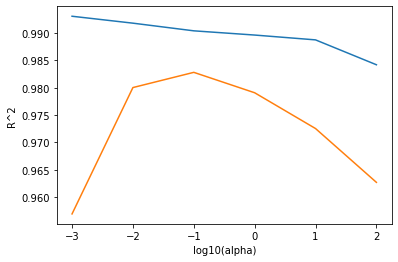

In [28]:
# alpha값에 따른 R2 그래프 그려보기  

import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

$\alpha=0.003$일때 Overfitting  
$\alpha=100$일때 Underfitting (Train Test 모두 점수 낮아짐)  
$\Rightarrow \alpha = 0.1$ 일때 최적!  
<br/>  

$\alpha = 0.1$로 최종 모델 훈련하기

In [29]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570365
0.9827976465386884


## 라쏘 회귀  
+ 계수의 절댓값을 기준으로 규제 적용  
+ 계수의 크기를 0으로 만들 수도 있음  


In [31]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


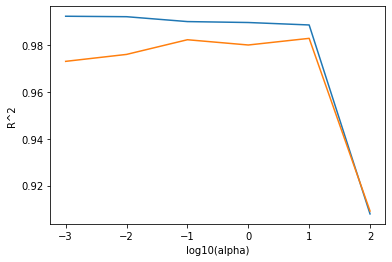

In [33]:
# 최적의 alpha값 찾기
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    lasso=Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

$\alpha=10$일 때 최적  

In [34]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [39]:
sum(lasso.coef_==0)

40